We choose a function over the interval $[0,1]$. 

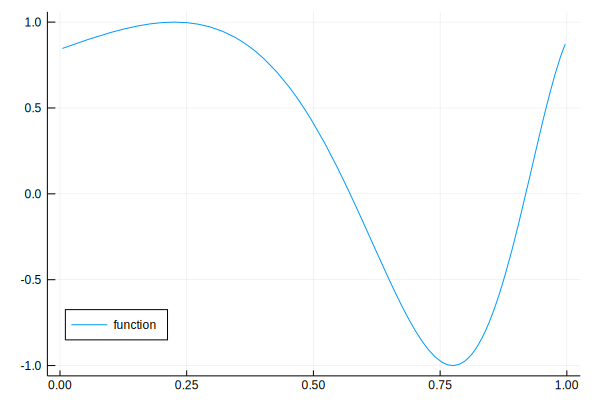

In [1]:
f = x -> sin(exp(2*x))

using Plots
plot(f,0,1,label="function",legend=:bottomleft)

We interpolate it at equally spaced nodes for increasing values of $n$. We will sample the interpolant at a large number of points in order to estimate the interpolation error. 

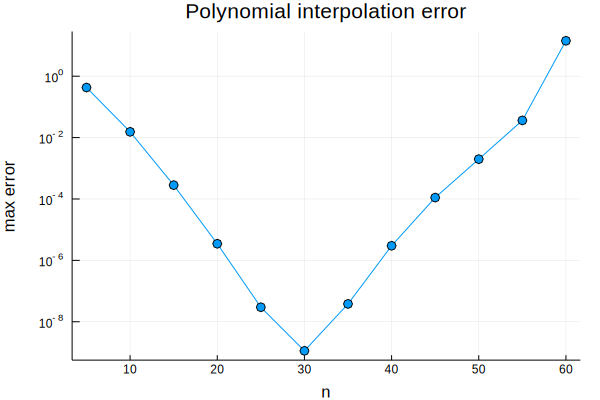

In [2]:
include("../FNC.jl")
n = (5:5:60)
err = zeros(size(n))
x = range(0,stop=1,length=1001)      # for measuring error
for (k,n) = enumerate(n) 
  t = range(0,stop=1,length=n+1)     # equally spaced nodes
  y = f.(t)                          # interpolation data
  p = FNC.polyinterp(t,y)
  err[k] = maximum( @. abs(f(x)-p(x)) )
end

plot(n,err,m=:o,label="", 
    xaxis=("n"),yaxis=(:log10,"max error"),
    title="Polynomial interpolation error")

Initially the error decreases exponentially, i.e. as $O(K^{-n})$ for some $K>1$. However, around $n=30$ the error starts to _grow_ exponentially. 